In [1]:
import pandas as pd
import cv2
import numpy as np
from sklearn.utils import shuffle
import os
from collections import deque
import copy
import matplotlib
import matplotlib.pyplot as plt
from keras.utils import np_utils

%matplotlib inline  

Using TensorFlow backend.


In [2]:
def file_generator(data_path,data_files,temporal_stride=1,temporal_length=16,temporal_padding='same'):
    
    for f in data_files:       
        tmp_df = pd.read_csv(os.path.join(data_path,f))
        label_list = list(tmp_df['Label'])
        total_images = len(label_list) 
        if total_images>=temporal_length:
            num_samples = int((total_images-temporal_length)/temporal_stride)+1
            print ('num of samples in this seq: {}'.format(num_samples))
            img_list = list(tmp_df['FileName'])
            frames_to_add=0
        else:
            num_samples = 1
            frames_to_add = temporal_length-total_images
            if frames_to_add<int(temporal_length/2):
                print ('{} has only {} samples. discarding {}'.format(f,samples_to_add,f))
                continue
            print ('num of samples in this seq: {}'.format(num_samples))
            img_list = list(tmp_df['FileName'])
            for n in range(num_samples):
                img_list.append(temporal_padding)

        start_frame = 0
        samples = deque()
        samp_count=0
        for img in img_list:
            samples.append(img)
            if len(samples)==temporal_length:
                #sample_info = 'video_id: {}, sample num: {}/{}'.format(f,samp_count+1,num_samples)
                #print ('loading-{}'.format(sample_info))
                samples_c=copy.deepcopy(samples)
                #self.dataset_list.append((sample_info,samples_c))
#                        samp=copy(samples)
#                        samples.popleft()
                samp_count+=1
                for t in range(temporal_stride):
                    samples.popleft()
                yield samples_c,label_list[0]

In [3]:
def load_samples(data_cat='train',temporal_stride=1,temporal_length=16):
    data_path = os.path.join('data_files',data_cat)
    data_files = os.listdir(data_path)
    file_gen = file_generator(data_path,data_files,temporal_stride=1,temporal_length=16)
    iterator = True
    data_list = []
    while iterator:
        try:
            x,y = next(file_gen)
            x=list(x)
            data_list.append([x,y])
        except Exception as e:
            print ('the exception: ',e)
            iterator = False
            print ('end of data generator')
    return data_list


In [4]:
train_data = load_samples(data_cat='train')

num of samples in this seq: 116
num of samples in this seq: 127
num of samples in this seq: 143
num of samples in this seq: 110
num of samples in this seq: 120
num of samples in this seq: 93
num of samples in this seq: 128
num of samples in this seq: 143
num of samples in this seq: 145
num of samples in this seq: 123
num of samples in this seq: 94
num of samples in this seq: 112
num of samples in this seq: 98
num of samples in this seq: 151
num of samples in this seq: 135
num of samples in this seq: 161
num of samples in this seq: 110
num of samples in this seq: 123
num of samples in this seq: 109
num of samples in this seq: 150
num of samples in this seq: 158
num of samples in this seq: 125
num of samples in this seq: 120
num of samples in this seq: 134
num of samples in this seq: 440
num of samples in this seq: 542
num of samples in this seq: 473
num of samples in this seq: 36
num of samples in this seq: 181
num of samples in this seq: 66
num of samples in this seq: 101
num of sample

num of samples in this seq: 186
num of samples in this seq: 220
num of samples in this seq: 186
num of samples in this seq: 285
num of samples in this seq: 345
num of samples in this seq: 385
num of samples in this seq: 284
num of samples in this seq: 177
num of samples in this seq: 225
num of samples in this seq: 186
num of samples in this seq: 108
num of samples in this seq: 186
num of samples in this seq: 186
num of samples in this seq: 225
num of samples in this seq: 225
num of samples in this seq: 165
num of samples in this seq: 165
num of samples in this seq: 186
num of samples in this seq: 181
num of samples in this seq: 225
num of samples in this seq: 225
num of samples in this seq: 225
num of samples in this seq: 225
num of samples in this seq: 225
num of samples in this seq: 225
num of samples in this seq: 136
num of samples in this seq: 136
num of samples in this seq: 116
num of samples in this seq: 195
num of samples in this seq: 140
num of samples in this seq: 137
num of s

In [5]:
len(train_data)

48609

In [6]:
train_data[0]

[['activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000000.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000001.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000002.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000003.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000004.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000005.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000006.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000007.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000008.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000009.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000010.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000011.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000012.png',
  'activity_data\\train\\Archery\\v_Archery_g01_c01\\img_000013.png',
  'activity_data\\tr

In [7]:
test_data = load_samples(data_cat='test')

num of samples in this seq: 184
num of samples in this seq: 153
num of samples in this seq: 137
num of samples in this seq: 145
num of samples in this seq: 125
num of samples in this seq: 115
num of samples in this seq: 75
num of samples in this seq: 144
num of samples in this seq: 77
num of samples in this seq: 76
num of samples in this seq: 70
num of samples in this seq: 79
num of samples in this seq: 84
num of samples in this seq: 105
num of samples in this seq: 101
num of samples in this seq: 83
num of samples in this seq: 86
num of samples in this seq: 160
num of samples in this seq: 203
num of samples in this seq: 190
num of samples in this seq: 50
num of samples in this seq: 55
num of samples in this seq: 76
num of samples in this seq: 58
num of samples in this seq: 53
num of samples in this seq: 108
num of samples in this seq: 100
num of samples in this seq: 96
num of samples in this seq: 90
num of samples in this seq: 76
num of samples in this seq: 71
num of samples in this se

In [8]:
len(test_data)

17707

In [9]:
def shuffle_data(samples):
    data = shuffle(samples,random_state=2)
    return data

In [10]:
def data_generator(data,batch_size=10,temporal_padding='same',shuffle=True):              
    """
    Yields the next training batch.
    Suppose `samples` is an array [[image1_filename,label1], [image2_filename,label2],...].
    """
    num_samples = len(data)
    if shuffle:
        data = shuffle_data(data)
    while True:   
        for offset in range(0, num_samples, batch_size):
            print ('startring index: ', offset) 
            # Get the samples you'll use in this batch
            batch_samples = data[offset:offset+batch_size]
            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []
            # For each example
            for batch_sample in batch_samples:
                # Load image (X)
                x = batch_sample[0]
                y = batch_sample[1]
                temp_data_list = []
                for img in x:
                    try:
                        img = cv2.imread(img)
                        #apply any kind of preprocessing here
                        #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                        img = cv2.resize(img,(224,224))
                        temp_data_list.append(img)

                    except Exception as e:
                        print (e)
                        print ('error reading file: ',img)                      
                # Read label (y)
                #label = label_names[y]
                # Add example to arrays
                X_train.append(temp_data_list)
                y_train.append(y)
    
            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.array(X_train)
            #X_train = np.rollaxis(X_train,1,4)
            y_train = np.array(y_train)
            y_train = np_utils.to_categorical(y_train, 3)
    
            # The generator-y part: yield the next training batch            
            yield X_train, y_train

In [11]:
train_generator = data_generator(train_data,batch_size=6,shuffle=True)

for k in range(10):
    x,y = next(train_generator)
    #print ('the label is: ',y)
    print (y.shape)
# Reinitializes the generator object
#train_generator = data_generator(train_data,batch_size=6,shuffle=True)
# Fit model using generator
#hist = model.fit_generator(train_generator, 
 #               samples_per_epoch=len(train_data),nb_epoch=100)

startring index:  0
(6, 3)
startring index:  6
(6, 3)
startring index:  12
(6, 3)
startring index:  18
(6, 3)
startring index:  24
(6, 3)
startring index:  30
(6, 3)
startring index:  36
(6, 3)
startring index:  42
(6, 3)
startring index:  48
(6, 3)
startring index:  54
(6, 3)


In [12]:
x.shape

(6, 16, 224, 224, 3)

In [15]:
sample = x[0]
sample.shape


(16, 224, 224, 3)

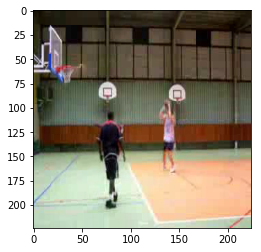

In [16]:
plt.imshow(sample[0,:,:,::-1])

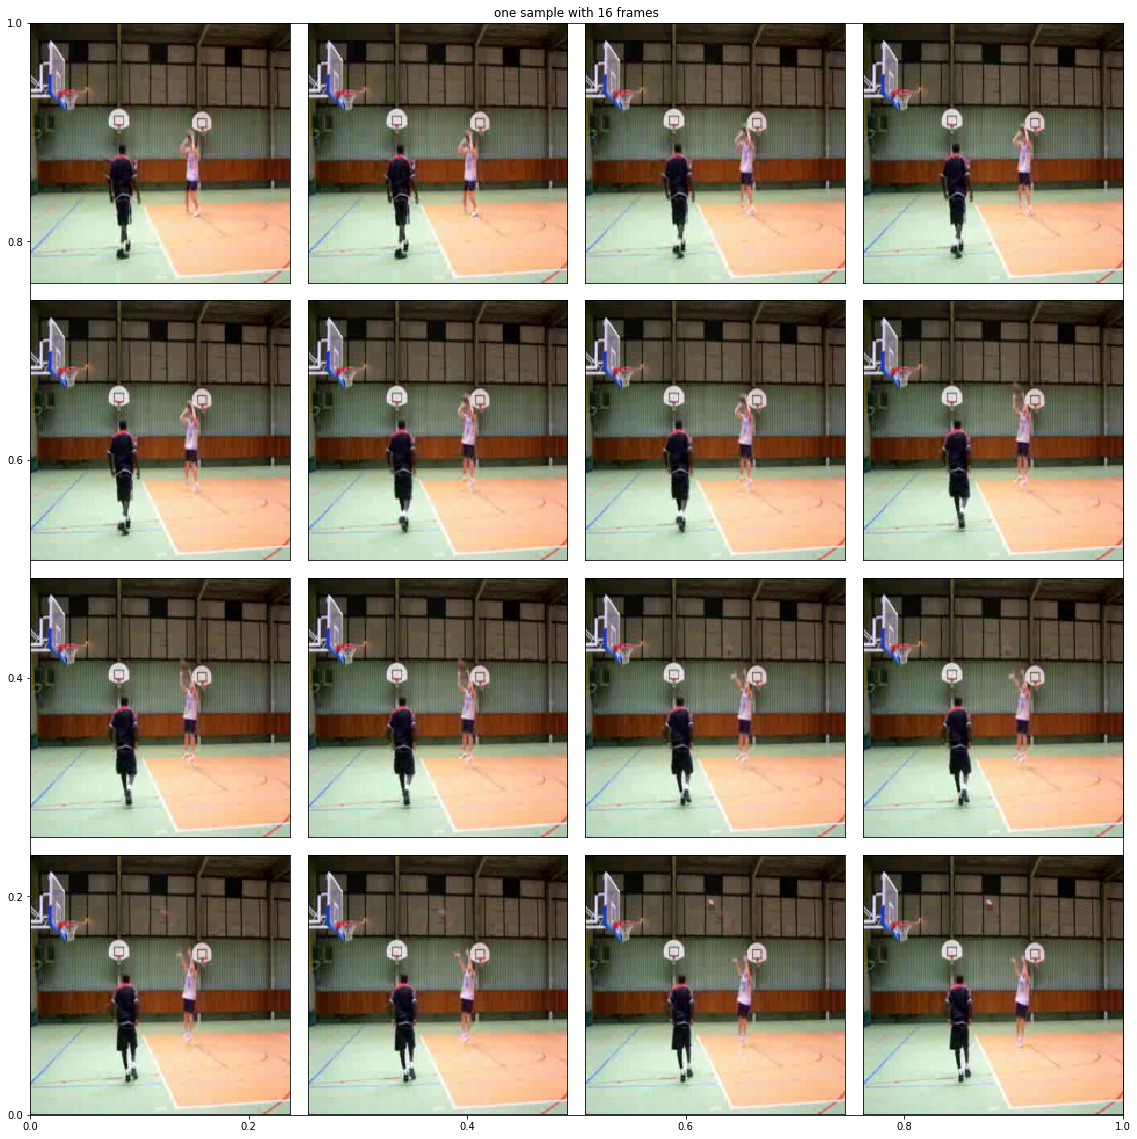

In [17]:

num_of_images=16
fig=plt.figure(figsize=(16,16))	
plt.title("one sample with {} frames".format(num_of_images))
subplot_num = int(np.ceil(np.sqrt(num_of_images)))
for i in range(int(num_of_images)):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
    #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
    ax.imshow(sample[i,:,:,::-1])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()
